In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('ecommerce_data.csv')

In [3]:
df.head()
df.shape

(500, 6)

In [4]:
#Applying Preprocessing Techniques
def Get_data():
    df=pd.read_csv('ecommerce_data.csv')
    data=df.as_matrix() #converting data into matrix form
    
    x=data[: ,:-1]  #All the data till last Column
    y=data[:,-1]    #data of last Column
    #Applying Preprocessing techniques
    x[: ,1]=(x[: ,1]-x[: ,1].mean())/x[: ,1].std()
    x[: ,2]=(x[: ,2]-x[: ,2].mean())/x[: ,2].std()
    #here we are going to work with the time of the day column
    N,D=x.shape
    x2=np.zeros((N,D+3))
    #As most of the values are going to be the same first 4 columns are going to be the same 
    x2[: ,:(D-1)]=x[: ,:(D-1)]
    #Applying the Preprocessing as time if of the day by splitting it into four parts
    for n in range(N):
        t=int(x[n,D-1])
        x2[n,t+D-1]=1
    #we can create a new matrix
    z=np.zeros((N,4))
    z[np.arange(N),x[:,D-1].astype(np.int32)]=1
    #Similar can be done as
    #x2[:,-4:]=z
    #to check if it works
    assert(np.abs(x2[:,-4:]-z).sum()<10e-10)
    return x2,y
def get_binary_data():
    x,y=Get_data()
    #print(x)
    #print(y)
    x2=x[x<=1]
    y2=y[y<=1]
    print(x2)
    print(y2)
    return x2,y2

    
data=get_binary_data()   

[ 1.         -0.81697841 -0.40827769 ...  0.          0.
  1.        ]
[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [5]:
data=df.as_matrix()
data[2:5 ,1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([0., 1., 1.])

In [6]:
n, d=data.shape

In [10]:
n


500

In [11]:
d

6

In [7]:
#ann_predict.py
#from process import Get_data
x,y=Get_data()
#Assingning wweights
M=5 #5 hidden Units
D=x.shape[1]
D

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


8

In [8]:
#Number of unique Values in Y
k=len(set(y))
k

4

In [9]:
w1=np.random.randn(D,M)
w1

array([[-0.4368205 ,  2.29504719,  0.29136594,  0.42268918,  0.79110149],
       [-0.02064315, -1.12830503,  0.33559012,  1.4739035 ,  1.17667369],
       [-1.74001312,  1.85954006,  0.31517056, -0.77806985, -0.14388182],
       [ 0.80658803,  1.41910728,  3.22511493,  0.60908782, -1.40037863],
       [ 0.49619176,  0.40141467, -0.03367213,  0.86978063, -0.51690709],
       [-0.62350625, -1.79199911,  0.52844364,  0.53001586,  0.639837  ],
       [-0.5122289 ,  0.60678296,  0.90981233,  0.41965091,  0.33702588],
       [ 0.86421479,  0.57270124, -0.33440786, -0.65480251,  1.49427041]])

In [10]:
b1=np.random.randn(1,M)
b1

array([[ 0.44170453, -1.60064378,  0.00893398,  0.54411512, -0.4963367 ]])

In [11]:
w2=np.random.randn(M,k)
w2

array([[-1.1043105 , -1.9792126 , -0.01700444, -1.96586876],
       [-1.01046645, -0.71472824, -2.60140268, -1.67708118],
       [ 0.33581131, -0.61396846, -0.39201637, -0.60110136],
       [ 0.44962313,  0.0644399 , -0.29228621, -0.57929715],
       [ 0.26449245,  0.57415523, -1.27588963, -0.43657119]])

In [12]:
b2=np.zeros(k)
b2

array([0., 0., 0., 0.])

In [13]:
def softmax(a):
    expA=np.exp(a)
    return expA/expA.sum(axis=1, keepdims=True)

In [14]:
def forward(x,w1,b1,w2,b2):
    #Calcualating the hidden layer Values
    z=np.tanh(x.dot(w1)+b1)
    return softmax(z.dot(w2)+b2)

In [15]:
p_of_y_givenx=forward(x,w1,b1,w2,b2)
predictions=np.argmax(p_of_y_givenx,axis=1)

In [16]:
#calculating accuracy
def classification_rate(y,p):
    return np.mean(y==p)
print("classification score: ", classification_rate(y,predictions))
    

classification score:  0.132


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


0   0.43149524262826033   0.46194613415017627
1000   0.07728899288655831   0.136806521545282
2000   0.07229914556496025   0.13490831595795597
3000   0.07050656603360515   0.1348892289744298
4000   0.06963353066172537   0.1351206572456924
5000   0.06913918583107717   0.13535462769365347
6000   0.0688322982729051   0.13554933926161447
7000   0.06862953325821264   0.1357041337889625
8000   0.06848938580525092   0.13582612876669478
9000   0.06838914886276698   0.13592259549199223
Final train classification rate:  0.925
Final test classification rate: 0.85


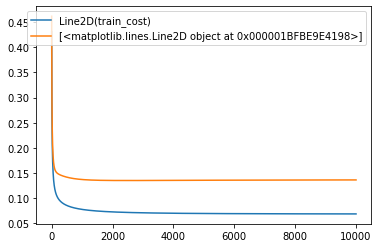

In [17]:
#Trainning Logistic Regression with softmax
from sklearn.utils import shuffle
#we are going to need an indicator matrix from targets
def y2indicator(y,K):
    N=len(y)
    ind=np.zeros((N,K))#indicator matrix
    for i in range(N):
        ind[i,y[i]]=1
    return ind
X,Y=Get_data()
X,Y=shuffle(X,Y)
Y=Y.astype(np.int32)
D=X.shape[1]
K=len(set(y))
Xtrain=X[:-100]
Ytrain=Y[:-100]
ytrain_ind=y2indicator(Ytrain,K)
Xtest=X[-100:]
Ytest=Y[-100:]
ytest_ind=y2indicator(Ytest,K)
W=np.random.randn(D,k)
b=np.zeros(k)
def forward(X,W,b):
    return softmax(X.dot(W)+b)
def predict(p_y_given_X):
    return np.argmax(p_y_given_X,axis=1)
def cross_entropy(T,pY):
    return -np.mean(T*np.log(pY))
train_cost=[]
test_cost=[]
learning_rate=0.001
for i in range(10000):
    pYtrain=forward(Xtrain,W,b)
    pYtest=forward(Xtest,W,b)
    
    ctrain=cross_entropy(ytrain_ind,pYtrain)
    ctest=cross_entropy(ytest_ind,pYtest)
    train_cost.append(ctrain)
    test_cost.append(ctest)
    W-=learning_rate*Xtrain.T.dot(pYtrain-ytrain_ind)
    b-=learning_rate*(pYtrain-ytrain_ind).sum(axis=0)
    if i%1000==0:
        print(i," ",ctrain," ",ctest)
print("Final train classification rate: ",classification_rate(Ytrain,predict(pYtrain)))
print("Final test classification rate:",classification_rate(Ytest,predict(pYtest)))
legend1,=plt.plot(train_cost,label='train_cost')
legend2=plt.plot(test_cost,label='test_cost')
plt.legend([legend1,legend2])
plt.show()
        
    




0   0.49443909887614396   0.48885357979098726
1000   0.04571799677991709   0.07373513587422878
2000   0.036015206624661227   0.06336727263889069
3000   0.030818001231136375   0.05992706241713622
4000   0.028278663716014202   0.06245778578129658
5000   0.02693062786501573   0.06508606488379383
6000   0.026052221609111817   0.06736571220404484
7000   0.02544034796143644   0.06943523667958292
8000   0.024978043635164492   0.07132457435799865
9000   0.02460702247944553   0.07305353530227558


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


Final train classification rate:  0.0
Final test classification rate: 0.0


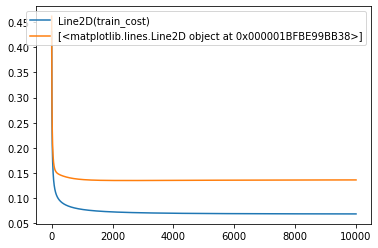

In [29]:
#Trainning a nueral network
def forward_Neural(x,w1,b1,w2,b2):
    #Calcualating the hidden layer Values
    z=np.tanh(x.dot(w1)+b1)
    #we need to return Z values also as they are the output of the every hidden layer
    return softmax(z.dot(w2)+b2),z
train_ncost = []
test_ncost = []
l_nrate = 0.001
for i in range(10000):
    pY_ntrain,Z_ntrain = forward_Neural(Xtrain,w1,b1,w2,b2)
    pY_ntest,Ztest = forward_Neural(Xtest,w1,b1,w2,b2)
    ctrain = cross_entropy(ytrain_ind,pY_ntrain)
    ctest = cross_entropy(ytest_ind,pY_ntest)
    train_ncost.append(ctrain)
    test_ncost.append(ctest)
    
    w2 -= l_nrate*Z_ntrain.T.dot(pY_ntrain-ytrain_ind)
    b2 -=l_nrate*(pYtrain-ytrain_ind).sum()
    dZ = (pY_ntrain-ytrain_ind).dot(w2.T)*(1-Z_ntrain*Z_ntrain)
    w1 -= l_nrate*Xtrain.T.dot(dZ)
    b1 -= learning_rate*dZ.sum(axis=0)
    
    if i%1000==0:
        print(i,' ',ctrain,' ',ctest)
print("Final train classification rate: ",classification_rate(pY_ntrain,predict(pY_ntrain)))
print("Final test classification rate:",classification_rate(pY_ntest,predict(pY_ntest)))
legend1,=plt.plot(train_cost,label='train_cost')
legend2=plt.plot(test_cost,label='test_cost')
plt.legend([legend1,legend2])
plt.show()

    
